In [1]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [3]:
from qiskit_textbook.widgets import binary_widget
binary_widget(nbits=5)

HTML(value='<pre>Binary   Decimal\n 00000 = 0</pre>')

## My first quantum circuit

In [5]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)

In [6]:
for j in range(n):
    qc_output.measure(j,j)

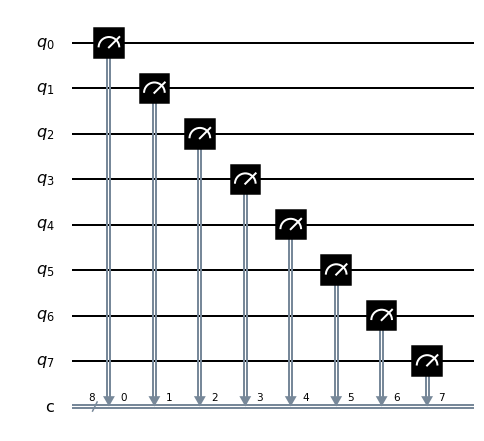

In [8]:
qc_output.draw(output='mpl')

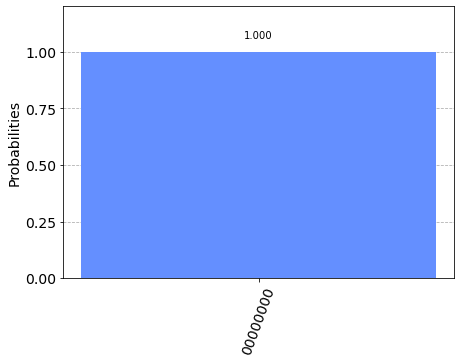

In [9]:
counts = execute(qc_output, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

# Creating an Adder Circuit

## Encoding an input

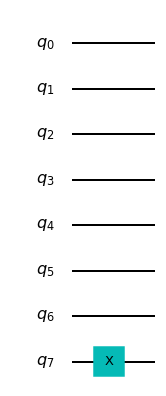

In [10]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)

qc_encode.draw(output='mpl')

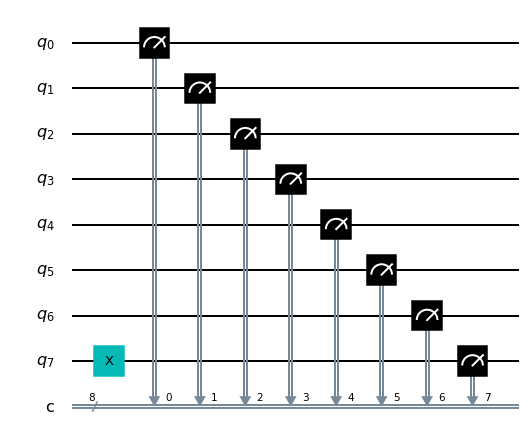

In [11]:
qc = qc_encode + qc_output
qc.draw(output='mpl', justify='none')

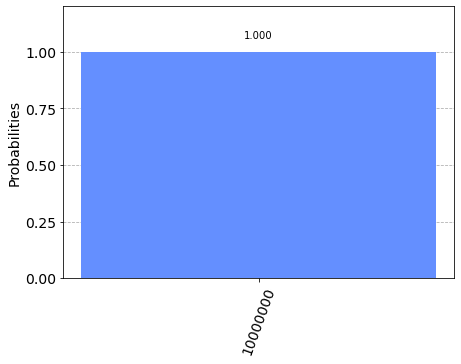

In [12]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

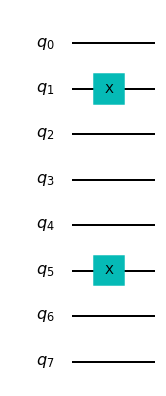

In [13]:
qc_encode = QuantumCircuit(n)
qc_encode.x(1)
qc_encode.x(5)

qc_encode.draw(output='mpl')

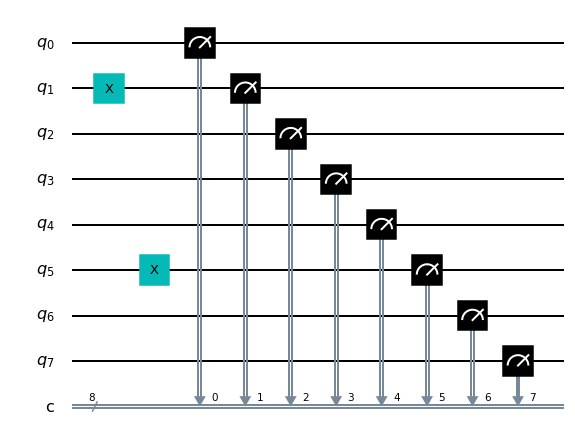

In [14]:
qc = qc_encode + qc_output
qc.draw(output='mpl', justify='none')

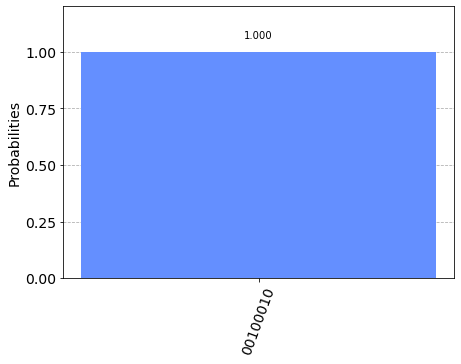

In [15]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Adding with Qiskit (half adder)

CNOT gate Like XOR gate

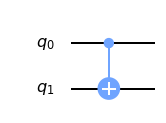

In [16]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw(output='mpl')

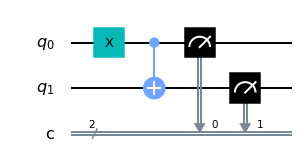

In [21]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

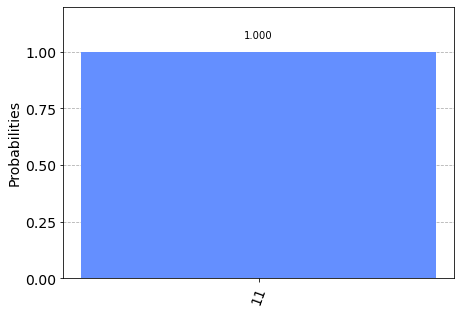

In [22]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

q0q1\
input: 00 \
output: 00

input: 10 \
output: 11

For HALF ADDER, this is halfway:

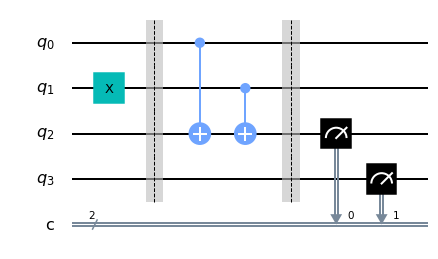

In [38]:
qc_ha = QuantumCircuit(4,2)
#qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

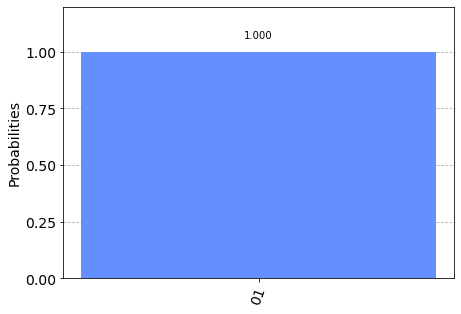

In [39]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

q0q1q2q3\
input: 0000\
output: 0000

input: 1000\
output: 1010

input: 0100\
output: 0110

input: 1100\
output: 1100

q0+q1 = q2\
0 + 0 = 0\
1 + 0 = 1\
0 + 1 = 1\
1 + 1 = 0

-----

Toffoli: 1+1=10

ccx gate works like AND gate (target is 1 when both control qubits are 1)

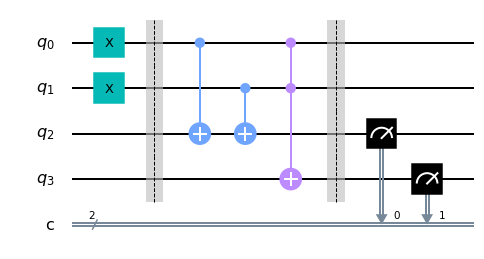

In [41]:
qc_ha = QuantumCircuit(4,2)
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()

qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)
qc_ha.barrier()

qc_ha.measure(2,0)
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

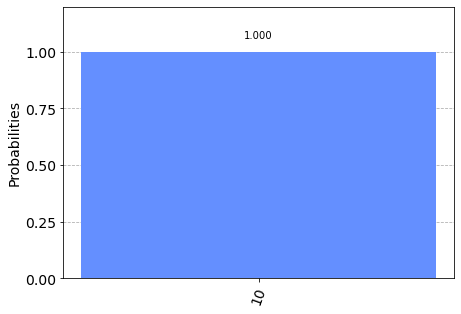

In [42]:
counts = execute(qc_ha, Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

q0q1 q3q2\
input: 00 00\
output: 00 00
 
input: 10 00\
output: 10 01

input: 01 00\
output: 01 01

input: 11 00\
output: 11 10

q0+q1 = q3q2\
0 + 0 = 0\
1 + 0 = 01\
0 + 1 = 01\
1 + 1 = 11